In [48]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [49]:
import torch
from torch import nn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

torch.__version__

'2.6.0'

## Data Preparation

In [50]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02)
y = X * weight + bias

X.shape

torch.Size([50])

In [51]:
X, y

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
         0.9300, 0.9440, 0.9580, 0.9720, 0.9860]))

In [52]:
X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

((torch.Size([40]), torch.Size([40])), (torch.Size([10]), torch.Size([10])))

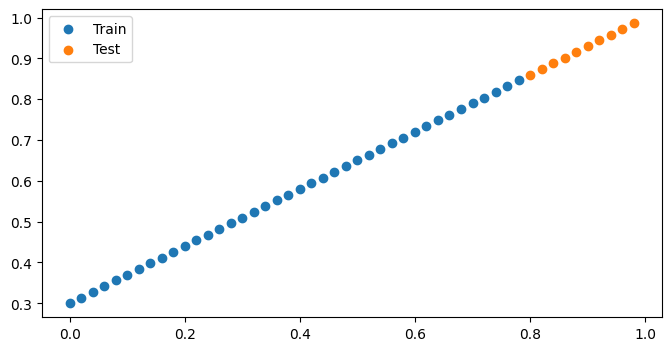

In [53]:
plt.figure(figsize=(8, 4))
plt.scatter(x=X_train, y=y_train, label="Train")
plt.scatter(x=X_test, y=y_test, label="Test")
plt.legend()

plt.show()

## Model building (Linear Regression)

### PyTorch model building essentials
PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader. 

In [54]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float32, requires_grad=True)) # nn.Parameter is useful as Module will consider these as trainable parameters
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float32, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    
torch.manual_seed(0)
model0 = LinearRegression()
list(model0.parameters())

[Parameter containing:
 tensor([0.4963], requires_grad=True),
 Parameter containing:
 tensor([0.7682], requires_grad=True)]

In [55]:
model0.state_dict()

OrderedDict([('weights', tensor([0.4963])), ('bias', tensor([0.7682]))])

In [56]:
# model0.eval()

# inference_mode acts like torch.no_grad() and doesn't output grads, basically turns off gradient tracking -> while inference_mode and no_grads works similar, inference_mode is newer and more preferred, and works faster.
with torch.inference_mode():
    y_preds = model0(X_test)
y_preds

tensor([1.1652, 1.1752, 1.1851, 1.1950, 1.2049, 1.2149, 1.2248, 1.2347, 1.2446,
        1.2546])

In [57]:
y_test

tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860])

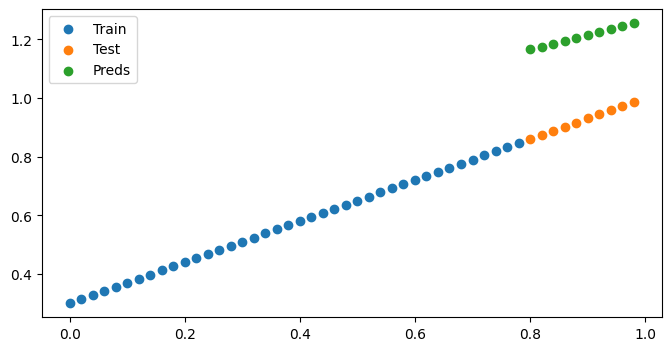

In [58]:
plt.figure(figsize=(8, 4))
plt.scatter(x=X_train, y=y_train, label="Train")
plt.scatter(x=X_test, y=y_test, label="Test")
plt.scatter(x=X_test, y=y_preds, label="Preds")

plt.legend()

plt.show()

## Model training

In [59]:
loss_fn = torch.nn.L1Loss()
optim = torch.optim.SGD(params=model0.parameters(), lr=1e-3)

In [60]:
epochs = 100
train_losses = []
test_losses = []

for epoch in range(epochs):
    model0.train()
    preds = model0(X_train)
    loss = loss_fn(y_train, preds)
    loss.backward()
    optim.step()
    optim.zero_grad()

    model0.eval()
    with torch.no_grad():
        test_preds = model0(X_test)
        test_loss = loss_fn(y_test, test_preds)

        if epoch%10==0:
            train_losses.append(loss.detach())
            test_losses.append(test_loss)
            print(f"Epoch: {epoch}, train loss: {loss}, test loss: {test_loss}")

Epoch: 0, train loss: 0.38876184821128845, test loss: 0.2855430841445923
Epoch: 10, train loss: 0.37724101543426514, test loss: 0.2720722556114197
Epoch: 20, train loss: 0.3657201826572418, test loss: 0.25860151648521423
Epoch: 30, train loss: 0.3541993498802185, test loss: 0.24513062834739685
Epoch: 40, train loss: 0.3426784873008728, test loss: 0.23165981471538544
Epoch: 50, train loss: 0.3311576545238495, test loss: 0.21818900108337402
Epoch: 60, train loss: 0.3196367919445038, test loss: 0.2047182023525238
Epoch: 70, train loss: 0.3081159293651581, test loss: 0.19124740362167358
Epoch: 80, train loss: 0.29659512639045715, test loss: 0.17777658998966217
Epoch: 90, train loss: 0.28507426381111145, test loss: 0.16430577635765076


In [61]:
def training_loop(epochs, model, X_train, y_train):
    losses = []
    for epoch in range(epochs):
        model.train()
        preds = model(X_train)
        loss = loss_fn(preds, y_train)
        loss.backward()
        optim.step()
        optim.zero_grad()
        if epoch%100==0:
            losses.append(loss.detach())
            print(f"Epoch: {epoch}, loss: {loss}")

    return losses

def testing_loop(epochs, model, X_test, y_test):
    test_losses = []
    for epoch in range(epochs):
        model.eval()
        with torch.inference_mode():
            pred = model(X_test)
            loss = loss_fn(y_test, pred)
        if epoch%100==0:
            test_losses.append(loss.detach())
            print(f"Epoch: {epoch}, test loss: {loss}")
    return test_losses

# train_losses = training_loop(epochs=1000, model=model0, X_train=X_train, y_train=y_train)
# test_losses = testing_loop(epochs=1000, model=model0, X_test=X_test, y_test=y_test)
# plt.plot(train_losses)

[]

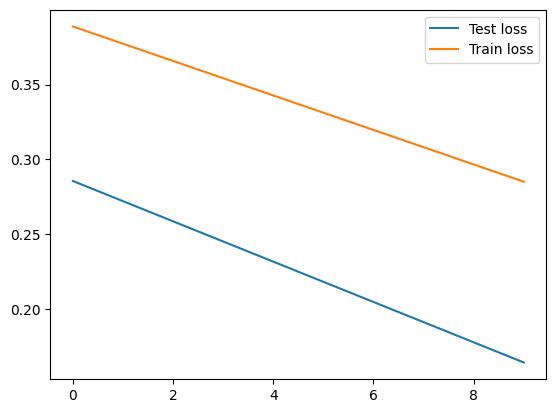

In [62]:
plt.plot(test_losses, label="Test loss")
plt.plot(train_losses, label="Train loss")

plt.legend()
plt.plot()

In [63]:
model0.state_dict()

OrderedDict([('weights', tensor([0.4573])), ('bias', tensor([0.6682]))])

## Predictions

In [64]:
model0.eval()

with torch.inference_mode():
    preds = model0(X_test)

preds

tensor([1.0340, 1.0432, 1.0523, 1.0615, 1.0706, 1.0798, 1.0889, 1.0980, 1.1072,
        1.1163])

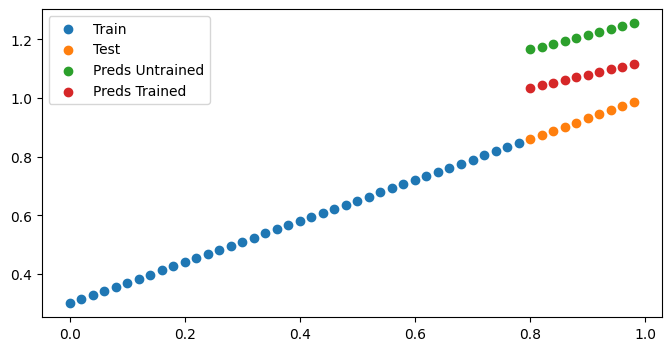

In [65]:
plt.figure(figsize=(8, 4))
plt.scatter(x=X_train, y=y_train, label="Train")
plt.scatter(x=X_test, y=y_test, label="Test")
plt.scatter(x=X_test, y=y_preds, label="Preds Untrained")
plt.scatter(x=X_test, y=preds, label="Preds Trained")

plt.legend()

plt.show()

## Saving and loading models

The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict(). As pickle is not secure.

In [66]:
import os
try:
    os.mkdir("models")
except Exception as e:
    print("Folder already exists")

torch.save(model0.state_dict(), "models/model0.pth")

Folder already exists


We can now load it in using torch.nn.Module.load_state_dict(torch.load(f))

Why call torch.load() inside torch.nn.Module.load_state_dict()?

Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

In [67]:
model0.state_dict(), model0.state_dict()['weights']

(OrderedDict([('weights', tensor([0.4573])), ('bias', tensor([0.6682]))]),
 tensor([0.4573]))

In [68]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load("models/model0.pth"))

<All keys matched successfully>

In [69]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.4573])), ('bias', tensor([0.6682]))])

So, now we can see that the new model has same weights as the saved models!

In [70]:
loaded_model.eval()

with torch.no_grad():
    preds_new = loaded_model(X_test)

preds == preds_new

tensor([True, True, True, True, True, True, True, True, True, True])

# Putting it together

In [71]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [95]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1, device=device)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(0)
model1 = LinearRegressionModel()
model1, model1.state_dict(), next(model1.parameters()).device

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2672]], device='mps:0')),
              ('linear_layer.bias', tensor([-0.7157], device='mps:0'))]),
 device(type='mps', index=0))

In [96]:
model1.to(device=device)
model1

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [97]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=1e-2)

In [98]:
epochs = 1000
train_losses = []
test_losses = []
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias 

X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

X_train = X_train.to(device=device)
X_test = X_test.to(device=device)

y_train = y_train.to(device=device)
y_test = y_test.to(device=device)

for epoch in range(epochs):
    # train
    model1.train()
    preds = model1(X_train)
    train_loss = loss_fn(preds, y_train)
    train_losses.append(train_loss.cpu().detach())
    train_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # eval
    model1.eval()
    with torch.inference_mode():
        preds = model1(X_test)
        test_loss = loss_fn(preds, y_test)
        test_losses.append(test_loss.cpu().detach())

        if epoch%50==0:
            print(f"Epoch: {epoch}, train loss: {train_loss}, test loss: {test_loss}")


Epoch: 0, train loss: 1.3929226398468018, test loss: 1.863031029701233
Epoch: 50, train loss: 0.8168728947639465, test loss: 1.189481258392334
Epoch: 100, train loss: 0.2408229410648346, test loss: 0.5159313082695007
Epoch: 150, train loss: 0.08571972697973251, test loss: 0.21390385925769806
Epoch: 200, train loss: 0.0679749846458435, test loss: 0.15817883610725403
Epoch: 250, train loss: 0.05080121383070946, test loss: 0.11818989366292953
Epoch: 300, train loss: 0.03362578898668289, test loss: 0.07820098847150803
Epoch: 350, train loss: 0.01645689271390438, test loss: 0.03752514347434044
Epoch: 400, train loss: 0.007999846711754799, test loss: 0.0064598023891448975
Epoch: 450, train loss: 0.007999846711754799, test loss: 0.0064598023891448975
Epoch: 500, train loss: 0.007999846711754799, test loss: 0.0064598023891448975
Epoch: 550, train loss: 0.007999846711754799, test loss: 0.0064598023891448975
Epoch: 600, train loss: 0.007999846711754799, test loss: 0.0064598023891448975
Epoch: 65

[]

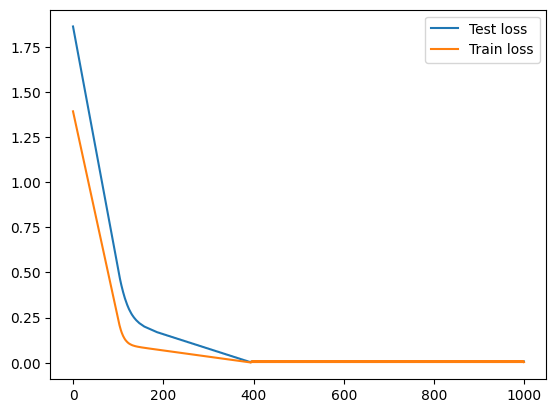

In [99]:
plt.plot(test_losses, label="Test loss")
plt.plot(train_losses, label="Train loss")

plt.legend()
plt.plot()

In [116]:
# Prediction

model1.eval()

with torch.no_grad():
    preds = model1(X_test)

preds

tensor([[0.8672],
        [0.8811],
        [0.8951],
        [0.9091],
        [0.9230],
        [0.9370],
        [0.9510],
        [0.9649],
        [0.9789],
        [0.9928]], device='mps:0')

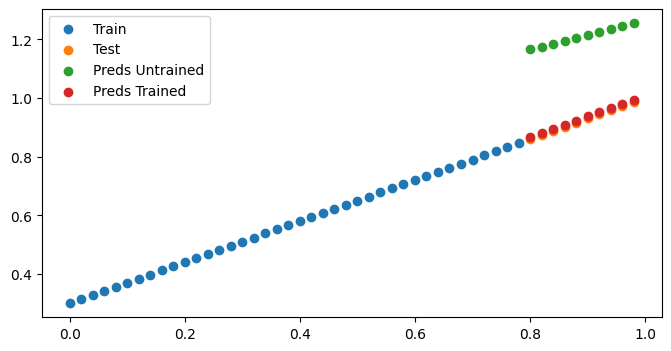

In [103]:
plt.figure(figsize=(8, 4))
plt.scatter(x=X_train.cpu(), y=y_train.cpu(), label="Train")
plt.scatter(x=X_test.cpu(), y=y_test.cpu(), label="Test")
plt.scatter(x=X_test.cpu(), y=y_preds.cpu(), label="Preds Untrained")
plt.scatter(x=X_test.cpu(), y=preds.cpu(), label="Preds Trained")

plt.legend()

plt.show()

Now, results here are very close.

**Saving and loading the model**

In [105]:
model1.state_dict(), model0.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.6980]], device='mps:0')),
              ('linear_layer.bias', tensor([0.3088], device='mps:0'))]),
 OrderedDict([('weights', tensor([0.4573])), ('bias', tensor([0.6682]))]))

In [106]:
torch.save(model1.state_dict(), "models/model1.pth")

In [110]:
# Loading model and predictions

model = LinearRegressionModel()
model.load_state_dict(torch.load("models/model1.pth"))
print(next(model.parameters()).device)
model.to(device=device)
next(model.parameters()).device, model, 

mps:0


(device(type='mps', index=0),
 LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ))

In [112]:
model.parameters(), model.state_dict()

(<generator object Module.parameters at 0x1320b1a80>,
 OrderedDict([('linear_layer.weight', tensor([[0.6980]], device='mps:0')),
              ('linear_layer.bias', tensor([0.3088], device='mps:0'))]))

In [118]:
model.eval()

with torch.no_grad():
    preds2 = model(X_test)

preds2 == preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')